In [1]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

流程如下： 数据处理（读取，清洗， 标准化， 重塑 ，分割） ，模型构建， 训练 ，预测， 可视化

In [2]:
data = pd.read_csv("Convid_19_american.csv")
data.head()

,data,new_confirmed_count,now_confirmed_count,cure,dead,total_confired_count
0,2020.02.22,23,34,0,0,34
1,2020.02.23,0,34,0,0,34
2,2020.02.24,0,31,3,0,34
3,2020.02.25,19,53,0,0,53
4,2020.02.26,4,57,0,0,57


In [4]:
data = data.iloc[:, 1:]

In [6]:
# 标准化
mean = data['total_confired_count'].mean()
std = data['total_confired_count'].std()

In [7]:
data = (data - data.mean(axis=0))/ data.std(axis=0)

In [8]:
data.head()

,new_confirmed_count,now_confirmed_count,cure,dead,total_confired_count
0,-1.404595,-1.384119,-0.860451,-1.226273,-1.189606
1,-1.406015,-1.384119,-0.860451,-1.226273,-1.189606
2,-1.406015,-1.384125,-0.860445,-1.226273,-1.189606
3,-1.404842,-1.384085,-0.860451,-1.226273,-1.189588
4,-1.405768,-1.384077,-0.860451,-1.226273,-1.189584


In [9]:
data = data.values
data

array([[-1.40459469e+00, -1.38411918e+00, -8.60451275e-01,
        -1.22627263e+00, -1.18960636e+00],
       [-1.40601508e+00, -1.38411918e+00, -8.60451275e-01,
        -1.22627263e+00, -1.18960636e+00],
       [-1.40601508e+00, -1.38412465e+00, -8.60444653e-01,
        -1.22627263e+00, -1.18960636e+00],
       [-1.40484171e+00, -1.38408453e+00, -8.60451275e-01,
        -1.22627263e+00, -1.18958770e+00],
       [-1.40576805e+00, -1.38407724e+00, -8.60451275e-01,
        -1.22627263e+00, -1.18958378e+00],
       [-1.40582981e+00, -1.38407177e+00, -8.60451275e-01,
        -1.22627263e+00, -1.18958083e+00],
       [-1.40601508e+00, -1.38407177e+00, -8.60451275e-01,
        -1.22627263e+00, -1.18958083e+00],
       [-1.40576805e+00, -1.38406447e+00, -8.60451275e-01,
        -1.22627263e+00, -1.18957691e+00],
       [-1.40570630e+00, -1.38405718e+00, -8.60451275e-01,
        -1.22625312e+00, -1.18957200e+00],
       [-1.40527400e+00, -1.38402252e+00, -8.60451275e-01,
        -1.22623361e+00

In [10]:
# 用十天的数据预测当前感染人数，构建训练数据
def data_gen(step=10, start_loc=0, end_loc=142):
    x, y =[], []
    for i in range(len(data)-step):
        x_temp = data[i:i+step, :-1]
        y_temp = data[i+step:i+step+1,-1]
        x.append(x_temp.tolist())
        y.append(y_temp.tolist())
    x = np.array(x) ; y=np.array(y)
    return x,y

In [12]:
train_x, train_y = data_gen()

构建模型

In [13]:
model = Sequential()
model.add(LSTM(128, input_shape=(10, 4), dropout= 0.5, recurrent_dropout=0.2, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss= 'mse', optimizer='Adam', metrics=['accuracy'])
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               68096     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 68,225
Trainable params: 68,225
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# 训练
LSTM = model.fit(train_x, train_y, batch_size=10, epochs=100, validation_data =(train_x, train_y)) 

Epoch 1/100
14/14 [==============================] - 3s 50ms/step - loss: 0.3243 - accuracy: 0.0000e+00 - val_loss: 0.1186 - val_accuracy: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0603 - accuracy: 0.0000e+00 - val_loss: 0.0118 - val_accuracy: 0.0000e+00
Epoch 3/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0734 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 4/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0633 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 5/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0579 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 6/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0610 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 7/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0569 - accuracy: 0.0000e

In [15]:
# 预测 
predict_y = model.predict(train_x)

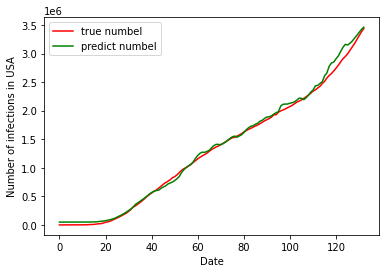

In [16]:
#可视化
import matplotlib.pyplot as plt
train_y =  train_y * std + mean
predict_y = predict_y*std + mean 
plt.figure()
plt.plot(range(len(train_y)), train_y, label="true numbel", color = 'red')
plt.plot(range(len(train_y)), predict_y, label="predict numbel", color = 'green')
plt.xlabel('Date')
plt.ylabel('Number of infections in USA')
plt.legend()
plt.show()

![LSTM 计算流程](https://img-blog.csdnimg.cn/20200720162425168.png)

此前做过相似的问题，这是[CSDN](https://blog.csdn.net/weixin_43705953/article/details/107418717)上的一个项目。